# Apple Stock Price Analysis & Forecasting



### Time Series Data
Time series data consists of data points organized in chronological order. Since time series data appears in numerous fields, being able to analyze it is essential for any data analyst or data scientist.

In this notebook, we’ll dive into stock market data, focusing on major technology stocks like Apple, Amazon, Google, and Microsoft. We’ll explore how to retrieve stock data using yfinance and visualize various patterns using Seaborn and Matplotlib. Additionally, we’ll analyze stock risk based on historical data, and we’ll even attempt to forecast future stock prices with a Long Short-Term Memory (LSTM) model!

We'll be answering the following questions along the way:


***   

## Getting the Data
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. Check this article to learn more about yfinance: [Reliably download historical market data from with Python](https://aroussi.com/post/python-yahoo-finance)

In [1]:
!pip install pandas_datareader


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install Plotly



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install yfinance


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price                     Adj Close Close High  Low Open Volume company_name  \
Ticker                         AAPL  AAPL AAPL AAPL AAPL   AAPL                
Date                                                                           
2024-10-21 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON   
2024-10-22 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON   
2024-10-23 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON   
2024-10-24 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON   
2024-10-25 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON   
2024-10-28 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON   
2024-10-29 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON   
2024-10-30 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON   
2024-10-31 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON   
2024-11-01 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON   

Price                     Adj Close Close High  ...       Low Open Volume  \
Ticker                         GOOG  GOOG GOOG  ... MSFT MSFT MSFT   MSFT   
Date                                            ...                         
2024-10-21 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-22 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-23 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-24 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-25 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-28 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-29 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-30 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-31 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-11-01 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   

Price                       Adj Close       Close        High         Low  \
Ticker                           AMZN        AMZN        AMZN        AMZN   
Date                                                                        
2024-10-21 00:00:00+00:00  189.070007  189.070007  189.460007  186.399994   
2024-10-22 00:00:00+00:00  189.699997  189.699997  191.520004  186.979996   
2024-10-23 00:00:00+00:00  184.710007  184.710007  189.160004  183.690002   
2024-10-24 00:00:00+00:00  186.380005  186.380005  187.110001  183.860001   
2024-10-25 00:00:00+00:00  187.830002  187.830002  190.449997  187.529999   
2024-10-28 00:00:00+00:00  188.389999  188.389999  190.210007  188.210007   
2024-10-29 00:00:00+00:00  190.830002  190.830002  191.460007  187.820007   
2024-10-30 00:00:00+00:00  192.729996  192.729996  195.610001  192.419998   
2024-10-31 00:00:00+00:00  186.399994  186.399994  190.600006  185.229996   
2024-11-01 00:00:00+00:00  197.929993  197.929993  200.500000  197.020004   

Price                            Open      Volume  
Ticker                           AMZN        AMZN  
Date                                               
2024-10-21 00:00:00+00:00  188.050003  24639400.0  
2024-10-22 00:00:00+00:00  188.350006  29650600.0  
2024-10-23 00:00:00+00:00  188.850006  31937100.0  
2024-10-24 00:00:00+00:00  185.250000  21647400.0  
2024-10-25 00:00:00+00:00  187.850006  29362100.0  
2024-10-28 00:00:00+00:00  189.570007  27930800.0  
2024-10-29 00:00:00+00:00  188.580002  35690200.0  
2024-10-30 00:00:00+00:00  194.699997  37707600.0  
2024-10-31 00:00:00+00:00  190.509995  75146800.0  
2024-11-01 00:00:00+00:00  199.000000  99571700.0  

[10 rows x 25 columns]

In [5]:
pd.set_option('display.max_rows', 100)

In [6]:
df.head(100)

Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2023-11-03 00:00:00+00:00  175.750656  176.649994  176.820007  173.350006   
2023-11-06 00:00:00+00:00  178.317520  179.229996  179.429993  176.210007   
2023-11-07 00:00:00+00:00  180.894333  181.820007  182.440002  178.970001   
2023-11-08 00:00:00+00:00  181.958893  182.889999  183.449997  181.589996   
2023-11-09 00:00:00+00:00  181.481339  182.410004  184.119995  181.809998   
2023-11-10 00:00:00+00:00  185.695358  186.399994  186.570007  183.529999   
2023-11-13 00:00:00+00:00  184.101410  184.800003  186.029999  184.210007   
2023-11-14 00:00:00+00:00  186.731415  187.440002  188.110001  186.300003   
2023-11-15 00:00:00+00:00  187.299255  188.009995  189.500000  187.779999   
2023-11-16 00:00:00+00:00  188.992844  189.710007  190.960007  188.649994   
2023-11-17 00:00:00+00:00  188.972916  189.690002  190.380005  188.570007   
2023-11-20 00:00:00+00:00  190.726242  191.449997  191.910004  189.880005   
2023-11-21 00:00:00+00:00  189.919327  190.639999  191.520004  189.740005   
2023-11-22 00:00:00+00:00  190.586792  191.309998  192.929993  190.830002   
2023-11-24 00:00:00+00:00  189.251846  189.970001  190.899994  189.250000   
2023-11-27 00:00:00+00:00  189.072525  189.789993  190.669998  188.899994   
2023-11-28 00:00:00+00:00  189.680222  190.399994  191.080002  189.399994   
2023-11-29 00:00:00+00:00  188.654129  189.369995  192.089996  188.970001   
2023-11-30 00:00:00+00:00  189.231918  189.949997  190.320007  188.190002   
2023-12-01 00:00:00+00:00  190.517059  191.240005  191.559998  189.229996   
2023-12-04 00:00:00+00:00  188.713882  189.429993  190.050003  187.449997   
2023-12-05 00:00:00+00:00  192.688812  193.419998  194.399994  190.179993   
2023-12-06 00:00:00+00:00  191.592987  192.320007  194.759995  192.110001   
2023-12-07 00:00:00+00:00  193.535614  194.270004  195.000000  193.589996   
2023-12-08 00:00:00+00:00  194.970154  195.710007  195.990005  193.669998   
2023-12-11 00:00:00+00:00  192.449707  193.179993  193.490005  191.419998   
2023-12-12 00:00:00+00:00  193.973953  194.710007  194.720001  191.720001   
2023-12-13 00:00:00+00:00  197.211655  197.960007  198.000000  194.850006   
2023-12-14 00:00:00+00:00  197.361084  198.110001  199.619995  196.160004   
2023-12-15 00:00:00+00:00  196.823120  197.570007  198.399994  197.000000   
2023-12-18 00:00:00+00:00  195.149460  195.889999  196.630005  194.389999   
2023-12-19 00:00:00+00:00  196.195511  196.940002  196.949997  195.889999   
2023-12-20 00:00:00+00:00  194.093491  194.830002  197.679993  194.830002   
2023-12-21 00:00:00+00:00  193.944031  194.679993  197.080002  193.500000   
2023-12-22 00:00:00+00:00  192.868149  193.600006  195.410004  192.970001   
2023-12-26 00:00:00+00:00  192.320221  193.050003  193.889999  192.830002   
2023-12-27 00:00:00+00:00  192.419830  193.149994  193.500000  191.089996   
2023-12-28 00:00:00+00:00  192.848206  193.580002  194.660004  193.169998   
2023-12-29 00:00:00+00:00  191.802185  192.529999  194.399994  191.729996   
2024-01-02 00:00:00+00:00  184.938217  185.639999  188.440002  183.889999   
2024-01-03 00:00:00+00:00  183.553482  184.250000  185.880005  183.429993   
2024-01-04 00:00:00+00:00  181.222321  181.910004  183.089996  180.880005   
2024-01-05 00:00:00+00:00  180.495087  181.179993  182.759995  180.169998   
2024-01-08 00:00:00+00:00  184.858521  185.559998  185.600006  181.500000   
2024-01-09 00:00:00+00:00  184.440109  185.139999  185.149994  182.729996   
2024-01-10 00:00:00+00:00  185.486130  186.190002  186.399994  183.919998   
2024-01-11 00:00:00+00:00  184.888412  185.589996  187.050003  183.619995   
2024-01-12 00:00:00+00:00  185.217163  185.919998  186.740005  185.190002   
2024-01-16 00:00:00+00:00  182.935822  183.630005  184.259995  180.929993

In above line of AAPL, GOOG, MSFT, AMZN comapany dataframe are downloaded and we concated all dataframes into df.
so We have four dataset, and 1 combined dataset.

In [7]:
AAPL


Price,Adj Close,Close,High,Low,Open,Volume,company_name
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,,
2023-11-03 00:00:00+00:00,175.750656,176.649994,176.820007,173.350006,174.240005,79763700,APPLE
2023-11-06 00:00:00+00:00,178.317520,179.229996,179.429993,176.210007,176.380005,63841300,APPLE
2023-11-07 00:00:00+00:00,180.894333,181.820007,182.440002,178.970001,179.179993,70530000,APPLE
2023-11-08 00:00:00+00:00,181.958893,182.889999,183.449997,181.589996,182.350006,49340300,APPLE
2023-11-09 00:00:00+00:00,181.481339,182.410004,184.119995,181.809998,182.960007,53763500,APPLE
...,...,...,...,...,...,...,...
2024-10-28 00:00:00+00:00,233.399994,233.399994,234.729996,232.550003,233.320007,36087100,APPLE
2024-10-29 00:00:00+00:00,233.669998,233.669998,234.330002,232.320007,233.100006,35417200,APPLE


In [8]:
GOOG

Price,Adj Close,Close,High,Low,Open,Volume,company_name
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG,
Date,,,,,,,
2023-11-03 00:00:00+00:00,130.050613,130.369995,130.729996,129.009995,129.089996,19517900,GOOGLE
2023-11-06 00:00:00+00:00,131.127975,131.449997,131.559998,129.929993,130.220001,15360400,GOOGLE
2023-11-07 00:00:00+00:00,132.075638,132.399994,133.279999,131.139999,131.979996,19223800,GOOGLE
2023-11-08 00:00:00+00:00,132.933533,133.259995,133.539993,132.160004,132.360001,15093600,GOOGLE
2023-11-09 00:00:00+00:00,131.367386,131.690002,133.960007,131.509995,133.360001,17976500,GOOGLE
...,...,...,...,...,...,...,...
2024-10-28 00:00:00+00:00,168.339996,168.339996,170.606003,165.789993,170.589996,20858300,GOOGLE
2024-10-29 00:00:00+00:00,171.139999,171.139999,171.860001,168.660004,169.384995,28916100,GOOGLE


In [9]:
MSFT

Price,Adj Close,Close,High,Low,Open,Volume,company_name
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT,
Date,,,,,,,
2023-11-03 00:00:00+00:00,350.171600,352.799988,354.390015,347.329987,349.630005,23624000,MICROSOFT
2023-11-06 00:00:00+00:00,353.873779,356.529999,357.540009,353.350006,353.450012,23828300,MICROSOFT
2023-11-07 00:00:00+00:00,357.844025,360.529999,362.459991,357.630005,359.399994,25833900,MICROSOFT
2023-11-08 00:00:00+00:00,360.494110,363.200012,363.869995,360.549988,361.679993,26767800,MICROSOFT
2023-11-09 00:00:00+00:00,358.002808,360.690002,364.790009,360.359985,362.299988,24847300,MICROSOFT
...,...,...,...,...,...,...,...
2024-10-28 00:00:00+00:00,426.589996,426.589996,431.940002,426.299988,431.660004,14882400,MICROSOFT
2024-10-29 00:00:00+00:00,431.950012,431.950012,433.170013,425.799988,428.000000,17644100,MICROSOFT


In [10]:
AMZN

Price,Adj Close,Close,High,Low,Open,Volume,company_name
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN,
Date,,,,,,,
2023-11-03 00:00:00+00:00,138.600006,138.600006,139.490005,137.449997,138.990005,44007200,AMAZON
2023-11-06 00:00:00+00:00,139.740005,139.740005,140.729996,138.360001,138.759995,44970400,AMAZON
2023-11-07 00:00:00+00:00,142.710007,142.710007,143.369995,140.500000,140.550003,53553500,AMAZON
2023-11-08 00:00:00+00:00,142.080002,142.080002,143.119995,141.220001,142.970001,44521700,AMAZON
2023-11-09 00:00:00+00:00,140.600006,140.600006,142.649994,139.839996,142.020004,36235400,AMAZON
...,...,...,...,...,...,...,...
2024-10-28 00:00:00+00:00,188.389999,188.389999,190.210007,188.210007,189.570007,27930800,AMAZON
2024-10-29 00:00:00+00:00,190.830002,190.830002,191.460007,187.820007,188.580002,35690200,AMAZON


# Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.



In [11]:
AAPL.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,199.177534,199.541474,201.185936,197.696614,199.410836,5.824639e+07
std,21.508029,21.319107,21.563977,20.957972,21.354987,3.029421e+07
min,164.585999,165.000000,166.399994,164.080002,165.350006,2.404830e+07
25%,182.559929,182.970001,184.755005,181.544998,182.905006,4.273530e+07
50%,192.419830,193.119995,194.399994,191.729996,193.080002,5.159100e+07
75%,221.705002,221.705002,224.259995,219.735001,221.639999,6.481840e+07
max,236.479996,236.479996,237.490005,234.449997,236.479996,3.186799e+08


# Description:

1.we have 252 records in data because weekends are not included in the data.
2.Apple Have standard deviation of 21.52. Means this will move from almost 21.52 unit up or down over over the year. So we can consider as volatile stock. 

# Information about the Data

In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-11-03 00:00:00+00:00 to 2024-11-01 00:00:00+00:00
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  251 non-null    float64
 1   (Close, AAPL)      251 non-null    float64
 2   (High, AAPL)       251 non-null    float64
 3   (Low, AAPL)        251 non-null    float64
 4   (Open, AAPL)       251 non-null    float64
 5   (Volume, AAPL)     251 non-null    int64  
 6   (company_name, )   251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


# Preprocessing Data

1. Flatten the multi-level column structure in the DataFrame.
2. Convert the date from the index to a column.
3. Check for any NaN values.
4. Check for duplicates and delete them if present.




In [13]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']


In [14]:
# Flatten the multi-level columns
AAPL.columns = [col[0] for col in AAPL.columns]
GOOG.columns = [col[0] for col in GOOG.columns]
MSFT.columns = [col[0] for col in MSFT.columns]
AMZN.columns = [col[0] for col in AMZN.columns]

# converting index of dates to date columns

AAPL.reset_index(inplace = True)
GOOG.reset_index(inplace = True)
MSFT.reset_index(inplace = True)
AMZN.reset_index(inplace = True)
    
    

In [15]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          251 non-null    datetime64[ns, UTC]
 1   Adj Close     251 non-null    float64            
 2   Close         251 non-null    float64            
 3   High          251 non-null    float64            
 4   Low           251 non-null    float64            
 5   Open          251 non-null    float64            
 6   Volume        251 non-null    int64              
 7   company_name  251 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 15.8+ KB


# Closing Price

The closing price is the last traded price of the stock during trading day. Closing Price is standard benchmark for the investor to track the performance of the stock over the period.

In [16]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          251 non-null    datetime64[ns, UTC]
 1   Adj Close     251 non-null    float64            
 2   Close         251 non-null    float64            
 3   High          251 non-null    float64            
 4   Low           251 non-null    float64            
 5   Open          251 non-null    float64            
 6   Volume        251 non-null    int64              
 7   company_name  251 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:

import plotly.express as px

# Create the interactive line plot for 'Close' prices
fig = px.line(AAPL, x='Date', y='Close', title='Apple Closing Prices',
              labels={'Close': 'Price', 'Date': 'Date'})

# Show the plot
fig.show()

In [18]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a 2x2 subplot
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=('Apple', 'Google', 'Microsoft', 'Amazon'))

# Add line plots for each DataFrame
fig.add_trace(go.Scatter(x=AAPL['Date'], y=AAPL['Close'], mode='lines', name='Close Price - AAPL'), row=1, col=1)
fig.add_trace(go.Scatter(x=GOOG['Date'], y=GOOG['Close'], mode='lines', name='Close Price - GOOG'), row=1, col=2)
fig.add_trace(go.Scatter(x=MSFT['Date'], y=MSFT['Close'], mode='lines', name='Close Price - MSFT'), row=2, col=1)
fig.add_trace(go.Scatter(x=AMZN['Date'], y=AMZN['Close'], mode='lines', name='Close Price - AMZN'), row=2, col=2)

# Update layout with larger figure size
fig.update_layout(title_text="Closing Prices of Stocks",
                  height=1000,  # Adjust height
                  width=1400)  # Adjust width

# Show the plot
fig.show()


# Analysis of Apple Stock

1. Plot all price metrics (Open, Close, High, Low) in a single window to gain insight into the stock's price fluctuations over time.


 

In [ ]:
Plot all price metrics (Open, Close, High, Low) in a single window to gain insight into the stock's price fluctuations over time.

In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a 2x2 subplot
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=('Close', 'Open', 'High', 'Low'))

# Add line plots for each DataFrame
fig.add_trace(go.Scatter(x=AAPL['Date'], y=AAPL['Close'], mode='lines', name='Close Price - AAPL'), row=1, col=1)
fig.add_trace(go.Scatter(x=AAPL['Date'], y=AAPL['Open'], mode='lines', name='Open Price - AAPL'), row=1, col=2)
fig.add_trace(go.Scatter(x=AAPL['Date'], y=AAPL['High'], mode='lines', name='High Price - AAPL'), row=2, col=1)
fig.add_trace(go.Scatter(x=AAPL['Date'], y=AAPL['Low'], mode='lines', name='Low Price - AAPL'), row=2, col=2)

# Update layout
fig.update_layout(title_text="Closing Prices of Apple Stock",
                  height=800, width=1000)

# Show the plot
fig.show()


# Volume of stock
     The volume of stock refers to the total number of shares traded in a particular period (e.g., daily). It is an important indicator in financial markets as it reflects the liquidity of a stock and can signal trends and potential reversals in price movement.

1. High volume indicates strong investor interest and can lead to more volatility in stock prices.

2. If a stock price increases with high volume, it suggests strong buying interest.

3. If a stock price rises but with low volume, it may indicate weak interest, suggesting a potential reversal.

In [20]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample DataFrames for demonstration (replace AAPL, GOOG, MSFT, and AMZN with your actual DataFrames)
# Each DataFrame should have a 'Date', 'Close', and 'Volume' column
tech_stocks = [AAPL, GOOG, MSFT, AMZN]
stock_names = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# Create 2x2 subplot
fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=stock_names,
                    shared_xaxes=False,
                    vertical_spacing=0.15)

# Add a line and volume plot for each stock
for i, (df, name) in enumerate(zip(tech_stocks, stock_names)):
    row, col = divmod(i, 2)
    row += 1
    col += 1
    
    # Plot Close price line
    fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name=f'{name} Close', line=dict(color='cyan')),
                  row=row, col=col)

    # Plot Volume as a bar
    fig.add_trace(go.Bar(x=df.index, y=df['Volume'], name=f'{name} Volume', marker=dict(color='rgba(0, 204, 150, 0.5)')),
                  row=row, col=col)

# Update layout for TradingView-like style
fig.update_layout(
    title="Closing Prices and Volume of Tech Stocks",
    template="plotly_dark",  # dark theme like TradingView
    height=1000, width=1400,  # Bigger size
    showlegend=False,
    xaxis_title="Date",
    yaxis_title="Price / Volume",
    xaxis_rangeslider_visible=False  # Hide default rangeslider
)

fig.show()


# Moving Average
Moving averages are a crucial tool in stock market analysis and predictions:

1. Trend Identification:

    Moving averages help smooth out price data over a specific period, making it easier to identify the overall direction (trend) of the stock. A rising moving average indicates an upward trend, while a declining moving average suggests a downward trend.

     
2. Volatility Analysis:

    By observing the distance between the moving average and the actual price, traders can gauge market volatility. A large gap indicates high volatility, while a small gap suggests low volatility.


In [21]:

def plot_stock_with_moving_averages_and_volume(stock_df, stock_name):
    # Ensure 'Date' is the index
    stock_df = stock_df.copy()
    stock_df['Date'] = stock_df.index
    stock_df['Previous Close'] = stock_df['Close'].shift(1)

    # Define moving averages
    ma_days = [10, 20, 50]
    for ma in ma_days:
        stock_df[f"MA_{ma}"] = stock_df['Adj Close'].rolling(window=ma).mean()

    # Create figure with subplots for candlestick and volume
    fig = go.Figure()

    # Add candlestick trace
    fig.add_trace(go.Candlestick(
        x=stock_df.index,
        open=stock_df['Open'],
        high=stock_df['High'],
        low=stock_df['Low'],
        close=stock_df['Close'],
        name='Candlestick'
    ))

    # Add moving averages as line plots
    for ma in ma_days:
        fig.add_trace(go.Scatter(
            x=stock_df.index,
            y=stock_df[f"MA_{ma}"],
            mode='lines',
            name=f'MA {ma} days'
        ))

    # Determine volume color based on previous close
    volume_colors = ['green' if close > prev_close else 'red' 
                     for close, prev_close in zip(stock_df['Close'], stock_df['Previous Close'])]

    # Add volume bars on a secondary y-axis
    fig.add_trace(go.Bar(
        x=stock_df.index,
        y=stock_df['Volume'],
        name='Volume',
        marker_color=volume_colors,
        opacity=0.4,
        yaxis='y2'
    ))

    # Update layout to emulate TradingView style with a black background
    fig.update_layout(
        title=f"{stock_name} Stock Price with Moving Averages and Volume",  # Include stock name in title
        yaxis_title="Price",
        yaxis2=dict(title='Volume', overlaying='y', side='right', showgrid=False),
        xaxis_title="Date",
        height=1000,
        width=1400,
        xaxis_rangeslider_visible=False,  # Hide default range slider
        plot_bgcolor='black',  # Set plot background color to black
        paper_bgcolor='black',  # Set paper background color to black
        font_color='white'  # Set font color to white for visibility
    )

    # Show the figure
    fig.show()



In [22]:
plot_stock_with_moving_averages_and_volume(AAPL, 'Apple Inc.')


In [23]:
plot_stock_with_moving_averages_and_volume(GOOG, 'Goolge Inc.')

In [24]:
plot_stock_with_moving_averages_and_volume(MSFT, 'Microsoft')

In [25]:
plot_stock_with_moving_averages_and_volume(AMZN, 'Amazon')

# Daily and Monthly Stock Returns for a Specified stock

In [26]:
!pip install calendar

ERROR: Could not find a version that satisfies the requirement calendar (from versions: none)
ERROR: No matching distribution found for calendar

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import pandas as pd
import plotly.graph_objects as go
import calendar

def stock_return_analysis(stock_df, stock_name):
    """
    Generates interactive plots to analyze daily and monthly stock returns for a specified stock.

    Parameters:
    - stock_df: DataFrame with 'Date' (index) and 'Close' columns.
    - stock_name: String with the stock name for use in the titles.

    Returns:
    - Interactive Plotly visualizations.
    """
    
    # Ensure 'Date' is in datetime format and set as index if it's not already
    if not pd.api.types.is_datetime64_any_dtype(stock_df.index):
        stock_df['Date'] = pd.to_datetime(stock_df['Date'])
        stock_df.set_index('Date', inplace=True)

    # Ensure required columns exist
    if 'Close' not in stock_df.columns:
        raise ValueError("The DataFrame must contain a 'Close' column.")

    # Calculate daily returns
    stock_df['Daily Return'] = stock_df['Close'].pct_change() * 100

    # Extract month names for readability in the plot
    stock_df['Month'] = stock_df.index.month
    stock_df['Month Name'] = stock_df['Month'].apply(lambda x: calendar.month_abbr[x])

    # Calculate monthly average returns
    monthly_avg_returns = stock_df.groupby('Month Name')['Daily Return'].mean()
    # Order by calendar months for correct display order
    monthly_avg_returns = monthly_avg_returns.reindex(calendar.month_abbr[1:])

    # Calculate yearly growth
    yearly_return = ((stock_df['Close'].iloc[-1] / stock_df['Close'].iloc[0]) - 1) * 100

    # Interactive daily return bar chart
    daily_return_fig = go.Figure(data=[
        go.Bar(x=stock_df.index, y=stock_df['Daily Return'], 
               name='Daily Return', 
               marker_color='blue')  # You can change this color if needed
    ])
    daily_return_fig.update_layout(title=f"{stock_name} Daily Returns",
                                    xaxis_title="Date", 
                                    yaxis_title="Daily Return (%)")

    # Create a bar chart for monthly average returns with specified colors
    monthly_colors = ['green' if value > 0 else 'red' for value in monthly_avg_returns]
    monthly_avg_return_fig = go.Figure(data=[
        go.Bar(x=monthly_avg_returns.index, y=monthly_avg_returns,
               name='Average Monthly Return',
               marker_color=monthly_colors)
    ])
    
    monthly_avg_return_fig.update_layout(title=f"{stock_name} Average Monthly Returns",
                                          xaxis_title="Month", 
                                          yaxis_title="Average Monthly Return (%)")

    # Annotate overall yearly growth
    yearly_growth_text = f"Yearly Growth: {yearly_return:.2f}%"
    monthly_avg_return_fig.add_annotation(
        x=0.5, y=1.1, showarrow=False, text=yearly_growth_text,
        xref="paper", yref="paper", font=dict(size=16, color="green" if yearly_return > 0 else "red")
    )

    # Display plots
    daily_return_fig.show()
    monthly_avg_return_fig.show()




In [28]:

import calendar

def stock_return_analysis(stock_df, stock_name):
    """
    Generates interactive plots to analyze daily and monthly stock returns for a specified stock.

    Parameters:
    - stock_df: DataFrame with 'Date' (index) and 'Close' columns.
    - stock_name: String with the stock name for use in the titles.

    Returns:
    - Interactive Plotly visualizations.
    """
    
    # Ensure 'Date' is in datetime format and set as index if it's not already
    if not pd.api.types.is_datetime64_any_dtype(stock_df.index):
        stock_df['Date'] = pd.to_datetime(stock_df['Date'])
        stock_df.set_index('Date', inplace=True)

    # Ensure required columns exist
    if 'Close' not in stock_df.columns:
        raise ValueError("The DataFrame must contain a 'Close' column.")

    # Calculate daily returns
    stock_df['Daily Return'] = stock_df['Close'].pct_change() * 100

    # Extract month names for readability in the plot
    stock_df['Month'] = stock_df.index.month
    stock_df['Month Name'] = stock_df['Month'].apply(lambda x: calendar.month_abbr[x])

    # Calculate monthly average returns
    monthly_avg_returns = stock_df.groupby('Month Name')['Daily Return'].mean()
    # Order by calendar months for correct display order
    monthly_avg_returns = monthly_avg_returns.reindex(calendar.month_abbr[1:])

    # Calculate yearly growth
    yearly_return = ((stock_df['Close'].iloc[-1] / stock_df['Close'].iloc[0]) - 1) * 100

    # Create a color list for daily returns (green for positive, red for negative)
    daily_colors = ['green' if value > 0 else 'red' for value in stock_df['Daily Return']]

    # Interactive daily return bar chart
    daily_return_fig = go.Figure(data=[go.Bar(
        x=stock_df.index,
        y=stock_df['Daily Return'],
        name='Daily Return',
        marker_color=daily_colors
    )])
    
    daily_return_fig.update_layout(title=f"{stock_name} Daily Returns",
                                    xaxis_title="Date", 
                                    yaxis_title="Daily Return (%)")

    # Create a bar chart for monthly average returns with specified colors
    monthly_colors = ['green' if value > 0 else 'red' for value in monthly_avg_returns]
    monthly_avg_return_fig = go.Figure(data=[go.Bar(
        x=monthly_avg_returns.index,
        y=monthly_avg_returns,
        name='Average Monthly Return',
        marker_color=monthly_colors
    )])
    
    monthly_avg_return_fig.update_layout(title=f"{stock_name} Average Monthly Returns",
                                          xaxis_title="Month", 
                                          yaxis_title="Average Monthly Return (%)")

    # Annotate overall yearly growth
    yearly_growth_text = f"Yearly Growth: {yearly_return:.2f}%"
    monthly_avg_return_fig.add_annotation(
        x=0.5, y=1.1, showarrow=False, text=yearly_growth_text,
        xref="paper", yref="paper", font=dict(size=16, color="green" if yearly_return > 0 else "red")
    )

    # Display plots
    daily_return_fig.show()
    monthly_avg_return_fig.show()



In [29]:
stock_return_analysis(AAPL, 'Apple')


## Daily and Monthly Analysis Key Points:

1. The highest daily return was 7.26%, observed in June.
2. Apple showed losses at the beginning of the year but delivered consistent profits from May onward. Based on this trend, investors looking for short-term gains might consider investing in April to capture potential high returns.
3. Apple achieved an annual return of 25.53%

# Average return for each weekday for the selected stock.









In [30]:
import pandas as pd
import plotly.express as px

def weekly_return_analysis(stock_df, stock_name="Stock"):
    """
    Analyzes and visualizes the average return for each weekday for a given stock.

    Parameters:
    - stock_df: DataFrame with 'Date' (index) and 'Close' columns.
    - stock_name: String with the stock name for use in the titles.

    Returns:
    - Interactive Plotly bar chart showing average daily return by weekday.
    """
    
    # Calculate daily returns
    stock_df['Daily Return'] = stock_df['Close'].pct_change() * 100
    
    # Extract weekday names
    stock_df['Weekday'] = stock_df.index.day_name()

    # Calculate the average return for each weekday
    weekday_avg_returns = stock_df.groupby('Weekday')['Daily Return'].mean()
    
    # Reorder by weekdays (Monday to Friday)
    ordered_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
    weekday_avg_returns = weekday_avg_returns.reindex(ordered_weekdays)

    # Create an interactive bar chart for average weekday returns
    weekday_return_fig = px.bar(weekday_avg_returns, 
                                x=weekday_avg_returns.index, 
                                y=weekday_avg_returns.values, 
                                title=f"{stock_name} Average Weekly Returns by Day",
                                labels={'y': 'Average Daily Return (%)', 'x': 'Weekday'},
                                text=weekday_avg_returns.values)
    
    # Highlight positive returns in green and negative returns in red
    weekday_return_fig.update_traces(marker_color=['green' if val > 0 else 'red' for val in weekday_avg_returns],
                                     texttemplate='%{text:.2f}%', textposition='outside')

    # Display the plot
    weekday_return_fig.update_layout(yaxis_title="Average Return (%)", xaxis_title="Weekday")
    weekday_return_fig.show()


In [31]:
weekly_return_analysis(AAPL)

In [32]:
import pandas as pd
import plotly.graph_objects as go

def weekday_profit_loss_analysis(stock_df, stock_name="Stock"):
    """
    Analyzes and visualizes the number of profit and loss days for each weekday for a given stock.

    Parameters:
    - stock_df: DataFrame with 'Date' (index) and 'Close' columns.
    - stock_name: String with the stock name for use in the titles.

    Returns:
    - Interactive Plotly bar chart showing the count of profit and loss days by weekday.
    """
    
    # Calculate daily returns
    stock_df['Daily Return'] = stock_df['Close'].pct_change() * 100
    
    # Extract weekday names
    stock_df['Weekday'] = stock_df.index.day_name()

    # Count the number of profit and loss days for each weekday
    profit_days_count = stock_df[stock_df['Daily Return'] > 0].groupby('Weekday').size()
    loss_days_count = stock_df[stock_df['Daily Return'] < 0].groupby('Weekday').size()
    
    # Reorder by weekdays (Monday to Friday)
    ordered_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
    profit_days_count = profit_days_count.reindex(ordered_weekdays, fill_value=0)
    loss_days_count = loss_days_count.reindex(ordered_weekdays, fill_value=0)

    # Create a bar chart for profit and loss days
    fig = go.Figure()

    # Add profit bars
    fig.add_trace(go.Bar(
        x=profit_days_count.index,
        y=profit_days_count,
        name='Profit Days',
        marker_color='green'
    ))

    # Add loss bars
    fig.add_trace(go.Bar(
        x=loss_days_count.index,
        y=loss_days_count,
        name='Loss Days',
        marker_color='red'
    ))

    # Update layout for better visualization
    fig.update_layout(
        title=f"{stock_name} Profit and Loss Days by Weekday",
        xaxis_title="Weekday",
        yaxis_title="Number of Days",
        barmode='group',  # Group bars together
        height=600,
        width=800
    )

    # Display the plot
    fig.show()



In [33]:
weekday_profit_loss_analysis(AAPL, "Apple Inc.")


## Key Points from Weekday Returns:

1. Friday shows a 50% probability of both high profits and high losses.
2. The "Apple Profit and Loss by Weekday" plot indicates that profits most frequently occur on Tuesdays.
3. There is a 63% probability of profit on Tuesdays, with stock prices often increasing on this day.


# 4. What was the correlation between different stocks closing prices?

# Correaltion
    Correlation is a statistical measure that describes the strength and direction of a relationship between two variables. It helps us understand how one variable might change in relation to another. In the context of stock prices, correlation tells us how two stocks move relative to each other.

Now Lets check is there any correalation between stocks



In [34]:

AAPL.index = AAPL.index.date
AAPL = AAPL.drop(columns=['Date'], errors='ignore')


In [35]:

GOOG.index = pd.to_datetime(GOOG['Date'])
GOOG.index = GOOG.index.date
GOOG = GOOG.drop(columns=['Date'], errors='ignore')


In [36]:

AMZN.index = pd.to_datetime(AMZN['Date'])
AMZN.index = AMZN.index.date
AMZN = AMZN.drop(columns=['Date'], errors='ignore')

In [37]:
MSFT.index = pd.to_datetime(MSFT['Date'])
MSFT.index = MSFT.index.date
MSFT = MSFT.drop(columns=['Date'], errors='ignore')


In [38]:
MSFT

,Adj Close,Close,High,Low,Open,Volume,company_name
2023-11-03,350.171600,352.799988,354.390015,347.329987,349.630005,23624000,MICROSOFT
2023-11-06,353.873779,356.529999,357.540009,353.350006,353.450012,23828300,MICROSOFT
2023-11-07,357.844025,360.529999,362.459991,357.630005,359.399994,25833900,MICROSOFT
2023-11-08,360.494110,363.200012,363.869995,360.549988,361.679993,26767800,MICROSOFT
2023-11-09,358.002808,360.690002,364.790009,360.359985,362.299988,24847300,MICROSOFT
...,...,...,...,...,...,...,...
2024-10-28,426.589996,426.589996,431.940002,426.299988,431.660004,14882400,MICROSOFT
2024-10-29,431.950012,431.950012,433.170013,425.799988,428.000000,17644100,MICROSOFT
2024-10-30,432.529999,432.529999,438.500000,432.100006,437.440002,29749100,MICROSOFT
2024-10-31,406.350006,406.350006,416.160004,406.299988,415.359985,53971000,MICROSOFT


In [39]:
GOOG

,Adj Close,Close,High,Low,Open,Volume,company_name
2023-11-03,130.050613,130.369995,130.729996,129.009995,129.089996,19517900,GOOGLE
2023-11-06,131.127975,131.449997,131.559998,129.929993,130.220001,15360400,GOOGLE
2023-11-07,132.075638,132.399994,133.279999,131.139999,131.979996,19223800,GOOGLE
2023-11-08,132.933533,133.259995,133.539993,132.160004,132.360001,15093600,GOOGLE
2023-11-09,131.367386,131.690002,133.960007,131.509995,133.360001,17976500,GOOGLE
...,...,...,...,...,...,...,...
2024-10-28,168.339996,168.339996,170.606003,165.789993,170.589996,20858300,GOOGLE
2024-10-29,171.139999,171.139999,171.860001,168.660004,169.384995,28916100,GOOGLE
2024-10-30,176.139999,176.139999,183.789993,175.744995,182.410004,49698300,GOOGLE
2024-10-31,172.690002,172.690002,178.419998,172.559998,174.720001,32801900,GOOGLE


In [40]:
AAPL

,Adj Close,Close,High,Low,Open,Volume,company_name,Daily Return,Month,Month Name,Weekday
2023-11-03,175.750656,176.649994,176.820007,173.350006,174.240005,79763700,APPLE,NaN,11,Nov,Friday
2023-11-06,178.317520,179.229996,179.429993,176.210007,176.380005,63841300,APPLE,1.460516,11,Nov,Monday
2023-11-07,180.894333,181.820007,182.440002,178.970001,179.179993,70530000,APPLE,1.445077,11,Nov,Tuesday
2023-11-08,181.958893,182.889999,183.449997,181.589996,182.350006,49340300,APPLE,0.588490,11,Nov,Wednesday
2023-11-09,181.481339,182.410004,184.119995,181.809998,182.960007,53763500,APPLE,-0.262451,11,Nov,Thursday
...,...,...,...,...,...,...,...,...,...,...,...
2024-10-28,233.399994,233.399994,234.729996,232.550003,233.320007,36087100,APPLE,0.859941,10,Oct,Monday
2024-10-29,233.669998,233.669998,234.330002,232.320007,233.100006,35417200,APPLE,0.115683,10,Oct,Tuesday
2024-10-30,230.100006,230.100006,233.470001,229.550003,232.610001,47070900,APPLE,-1.527792,10,Oct,Wednesday
2024-10-31,225.910004,225.910004,229.830002,225.369995,229.339996,64370100,APPLE,-1.820948,10,Oct,Thursday


In [41]:
# Create a new DataFrame for correlation analysis
correlation_df = pd.DataFrame({
    'AAPL_Close': AAPL['Close'],
    'MSFT_Close': MSFT['Close'],
    'AMZN_Close': AMZN['Close'],
    'GOOG_Close': GOOG['Close']
})

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Display the correlation matrix
print(correlation_matrix)


            AAPL_Close  MSFT_Close  AMZN_Close  GOOG_Close
AAPL_Close    1.000000    0.443049    0.398961    0.547222
MSFT_Close    0.443049    1.000000    0.910125    0.824878
AMZN_Close    0.398961    0.910125    1.000000    0.810466
GOOG_Close    0.547222    0.824878    0.810466    1.000000


<Axes: >

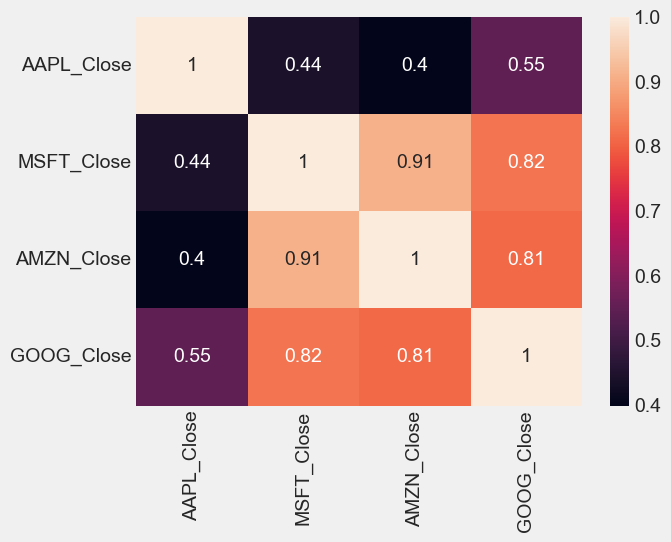

In [42]:
sns.heatmap(correlation_matrix, annot= True)

# Correlation:

1. APPLE STOCK 55% CORREALATED WITH THE GOOGLE STOCK. IT MEANS IF ONE STOCK MOVES 10 POINTS UP GOOGLE STOCK ALSO MOVE 5 POINTS UP AND DOWN RESPECTIVELY.
2. MICROSOFT IS FULL POSITIVE CORRELATION WITH AMAZON STOCK, IF MICROSOFT STOCK PRICE INCREASE AUTOMATICALLY AMAZON STOCK PRICE INCREASES IF DECREASES AUTOMATICALLY
3. MICROSOFT AND GOOGLE ALSO FULLY POSITIVE CORREALATED.




# VALUE AT RISK:

how much value is at risk by investing in a particular stock, we can use Value at Risk (VaR). VaR quantifies the potential loss in value of an asset or portfolio over a specified time period, under normal market conditions, with a given confidence level

HERE WE ARE USING HISTORICAL METHOD:

1. This method uses historical price data to simulate past returns.
2. Calculate the daily returns, and then identify the quantile at the desired confidence level.


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_var(stock_df, confidence_level=0.05, stock_name="Stock"):
    """
    Calculates and visualizes the Value at Risk (VaR) at a specified confidence level for a given stock.

    Parameters:
    - stock_df: DataFrame with at least 'Close' column. Should contain a 'Return' column if available.
    - confidence_level: float, the confidence level to calculate VaR (default 0.05 for 95%).
    - stock_name: str, the name of the stock for labeling purposes.

    Returns:
    - var: float, the calculated Value at Risk.
    """
    
    # Check if 'Return' column exists, if not, calculate it
    if 'Return' not in stock_df.columns:
        stock_df['Return'] = stock_df['Close'].pct_change() * 100  # Convert to percentage

    # Drop NaN values from the Return column
    daily_returns = stock_df['Return'].dropna()

    # Calculate VaR at the specified confidence level
    var = np.percentile(daily_returns, confidence_level * 100)

    print(f"Value at Risk (VaR) at {confidence_level*100}% confidence level for {stock_name}: {var:.2f}%")

    # Plot histogram of daily returns with VaR threshold
    plt.figure(figsize=(10, 6))
    plt.hist(daily_returns, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(var, color='red', linestyle='dashed', linewidth=2, label=f'VaR ({confidence_level*100}%): {var:.2f}%')
    plt.title(f'{stock_name} Daily Returns Distribution with VaR')
    plt.xlabel('Daily Return (%)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    return var



Value at Risk (VaR) at 5.0% confidence level for Apple Inc.: -2.18%


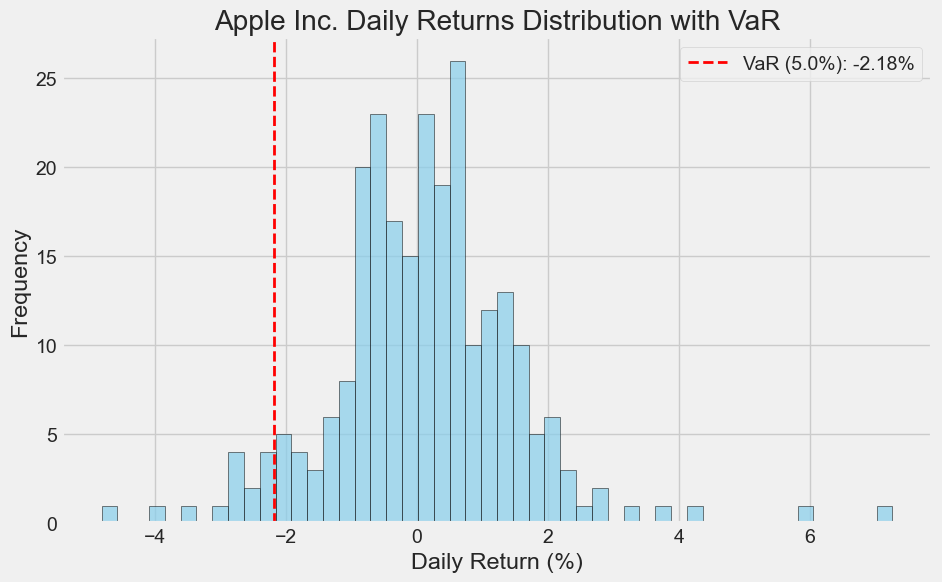

-2.175528394354638

In [44]:

calculate_var(AAPL, confidence_level=0.05, stock_name="Apple Inc.")

Value at Risk (VaR) at 5.0% confidence level for GOOGLE: -2.35%


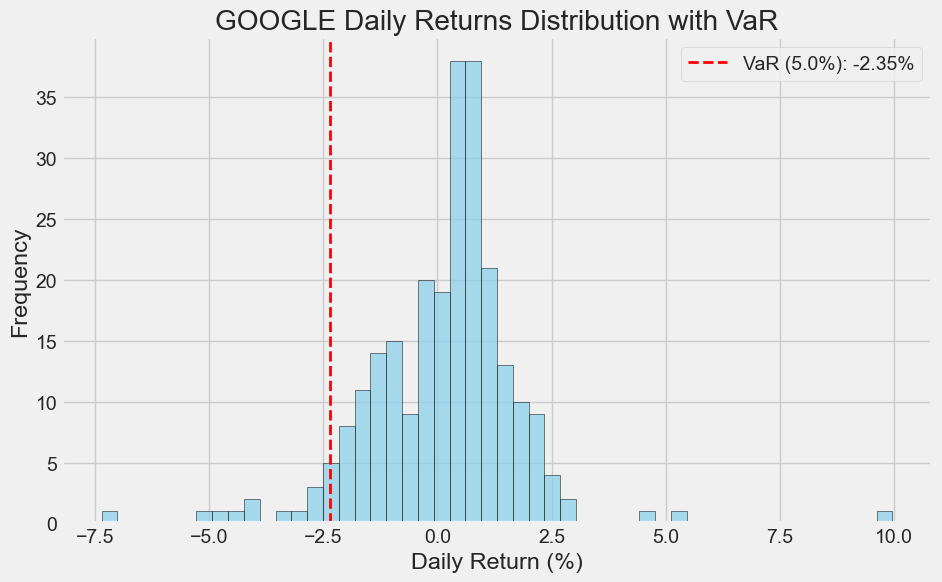

-2.3495407100821772

In [45]:
calculate_var(GOOG, confidence_level=0.05, stock_name="GOOGLE")


Value at Risk (VaR) at 5.0% confidence level for AMAZON: -2.38%


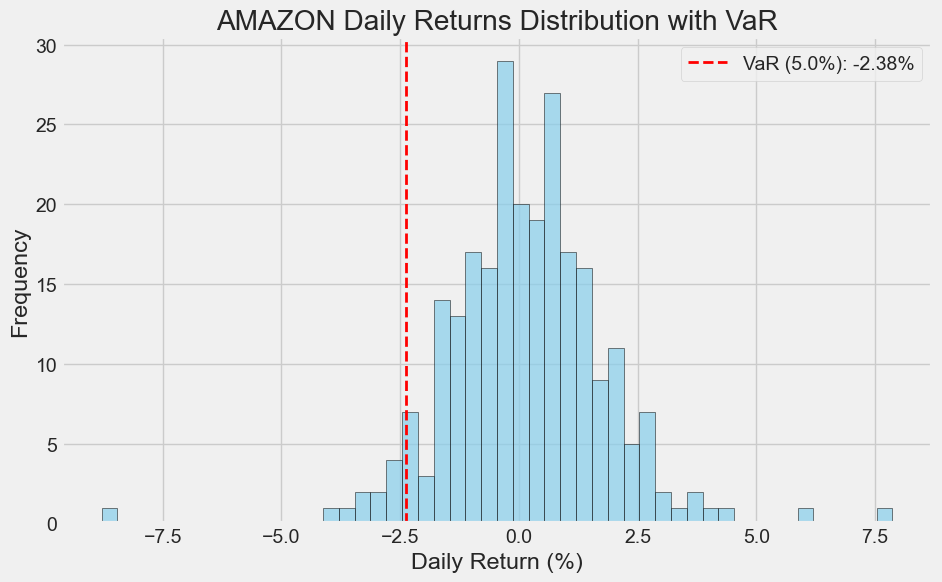

-2.382085302798429

In [46]:

calculate_var(AMZN, confidence_level=0.05, stock_name="AMAZON")

Value at Risk (VaR) at 5.0% confidence level for MICROSOFT: -2.12%


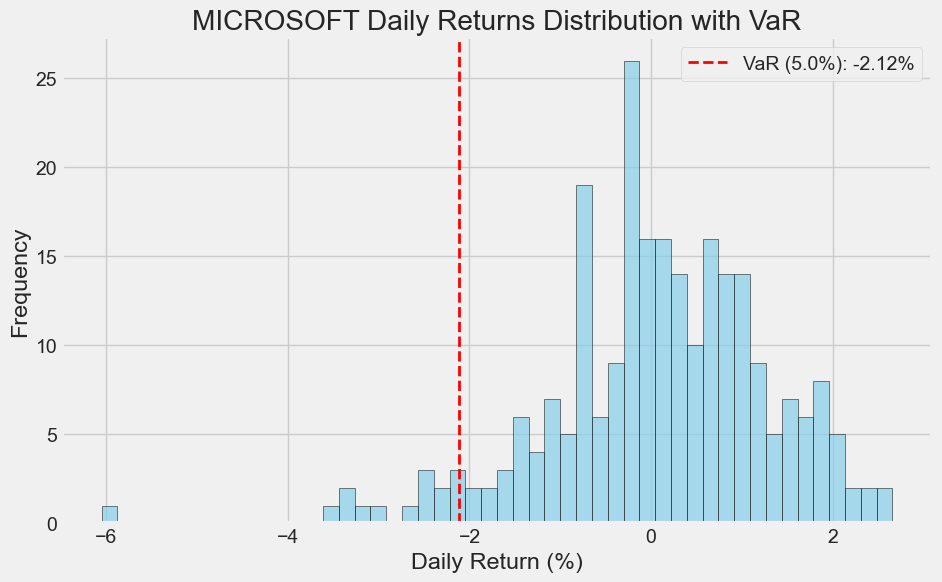

-2.1153590766212664

In [47]:

calculate_var(MSFT, confidence_level=0.05, stock_name="MICROSOFT")

# VaR CALCULATION KEY POINTS 
1. ALMOST 4 STOCK ARE LOW RISK OF OUR CAPITAL. ALL STOCKS ARE HAVING RISK OF 2 - 2.4%. 
2. IF WE SEE SPECIFICALLY THEN LITTLE LOW RISK IF WE INVEST IN APPLE AND MICROSOFT.

# PREDICTING CLOSE PRICE OF APPLE STOCK

In [48]:
from pandas_datareader import data as pdr
from datetime import datetime


In [49]:
import yfinance as yf
from datetime import datetime

# Set the stock ticker and date range
ticker = 'AAPL'
start_date = '2012-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')

# Fetch the data
Apple = yf.download(ticker, start=start_date, end=end_date)
print(Apple)

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2012-01-03 00:00:00+00:00   12.402626   14.686786   14.732143   14.607143   
2012-01-04 00:00:00+00:00   12.469278   14.765714   14.810000   14.617143   
2012-01-05 00:00:00+00:00   12.607715   14.929643   14.948214   14.738214   
2012-01-06 00:00:00+00:00   12.739515   15.085714   15.098214   14.972143   
2012-01-09 00:00:00+00:00   12.719306   15.061786   15.276786   15.048214   
...                               ...         ...         ...         ...   
2024-10-28 00:00:00+00:00  233.399994  233.399994  234.729996  232.550003   
2024-10-29 00:00:00+00:00  233.669998  233.669998  234.330002  232.320007   
2024-10-30 00:00:00+00:00  230.100006  230.100006  233.470001  229.550003   
2024-10-31 00:00:00+00:00  225.910004  225.910004  229.830002  225.369995   

In [50]:
Apple.shape

(3230, 6)

In [51]:
Apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3230 entries, 2012-01-03 00:00:00+00:00 to 2024-11-01 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  3230 non-null   float64
 1   (Close, AAPL)      3230 non-null   float64
 2   (High, AAPL)       3230 non-null   float64
 3   (Low, AAPL)        3230 non-null   float64
 4   (Open, AAPL)       3230 non-null   float64
 5   (Volume, AAPL)     3230 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 176.6 KB


In [52]:
# Flatten the multi-level columns
Apple.columns = [col[0] for col in Apple.columns]


In [53]:
Apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3230 entries, 2012-01-03 00:00:00+00:00 to 2024-11-01 00:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  3230 non-null   float64
 1   Close      3230 non-null   float64
 2   High       3230 non-null   float64
 3   Low        3230 non-null   float64
 4   Open       3230 non-null   float64
 5   Volume     3230 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 176.6 KB


In [54]:


# Create the interactive line plot for 'Close' prices
fig = px.line(Apple, x=Apple.index, y='Close', title='Apple Closing Prices',
              labels={'Close': 'Price', 'Date': 'Date'})

# Show the plot
fig.show()

In [55]:
apl_close = Apple.filter(["Close"])

# CONVERTING DATAFRAME TO NUMPY ARRAY
dataset = apl_close.values

# Get the number of rows to train the model on
train_data_len = int(np.ceil( len(dataset) * .95 ))

train_data_len 

3069

In [56]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [57]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(train_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data  -- [samples, time steps, features].
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.00332215, 0.00367683, 0.00441348, 0.00511482, 0.00500729,
       0.00524963, 0.00513889, 0.00495273, 0.00469915, 0.00548395,
       0.00619171, 0.00597344, 0.00477779, 0.00591888, 0.00479545,
       0.00900831, 0.00868252, 0.00910782, 0.01002743, 0.01058432,
       0.01053778, 0.01036606, 0.0110979 , 0.0117864 , 0.01256638,
       0.01382623, 0.01647271, 0.01651284, 0.01798614, 0.0190871 ,
       0.01719492, 0.01792354, 0.0179091 , 0.01995214, 0.01966165,
       0.02019929, 0.02116544, 0.02170309, 0.02325182, 0.02438006,
       0.02470586, 0.02481981, 0.02289072, 0.02242529, 0.02249431,
       0.02430785, 0.02481821, 0.02591436, 0.02849824, 0.03194558,
       0.0313004 , 0.03130201, 0.03379442, 0.03457441, 0.03401911,
       0.03351196, 0.03298395, 0.0347381 , 0.03594178, 0.03644572])]
[0.03520031440172121]

[array([0.00332215, 0.00367683, 0.00441348, 0.00511482, 0.00500729,
       0.00524963, 0.00513889, 0.00495273, 0.00469915, 0.00548395,
       0.00619171, 0.00597344, 0.00

In [58]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Model Building
model = Sequential()

# First LSTM layer with Dropout and Batch Normalization
model.add(Bidirectional(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1))))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Second LSTM layer with Dropout and Batch Normalization
model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Third LSTM layer without return sequences
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Use ReduceLROnPlateau to adjust the learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=30, validation_split=0.1, callbacks=[reduce_lr])


Epoch 1/30


d:\Praveen_Ravva\Data science\VSCODE\Data_Science\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



43/43 ━━━━━━━━━━━━━━━━━━━━ 13s 156ms/step - loss: 0.0958 - val_loss: 0.5169 - learning_rate: 1.0000e-04
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - loss: 0.0426 - val_loss: 0.4917 - learning_rate: 1.0000e-04
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - loss: 0.0249 - val_loss: 0.4436 - learning_rate: 1.0000e-04
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - loss: 0.0164 - val_loss: 0.3927 - learning_rate: 1.0000e-04
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - loss: 0.0124 - val_loss: 0.3547 - learning_rate: 1.0000e-04
Epoch 6/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - loss: 0.0091 - val_loss: 0.2699 - learning_rate: 1.0000e-04
Epoch 7/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - loss: 0.0074 - val_loss: 0.1975 - learning_rate: 1.0000e-04
Epoch 8/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - loss: 0.0070 - val_loss: 0.1823 - learning_rate: 1.0000e-04
Epoch 9/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - loss: 0.0057 - val_loss: 0.0913 - learning_r

In [59]:
# Assume `scaler` was already fitted on the original `dataset`
# Create the testing data set
test_data = scaled_data[train_data_len - 60:, :]  # Adjust range for test data

# Create x_test from the last 60 days of train_data_len
x_test = []
y_test = dataset[train_data_len:, :]  # Actual values for comparison

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert x_test to a numpy array and reshape
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)

# Use the previously fitted scaler to inverse transform predictions
predictions = scaler.inverse_transform(predictions)
predictions


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step


array([[168.74478],
       [168.82794],
       [169.24612],
       [170.22324],
       [171.66872],
       [170.64757],
       [170.38164],
       [169.71983],
       [168.94212],
       [169.393  ],
       [169.12321],
       [168.60132],
       [167.92534],
       [167.67378],
       [167.23337],
       [167.15068],
       [166.76694],
       [166.8655 ],
       [166.39467],
       [168.13234],
       [169.69777],
       [169.80705],
       [169.09135],
       [168.23656],
       [167.32996],
       [166.09076],
       [165.43509],
       [165.20166],
       [165.59727],
       [166.11058],
       [166.3497 ],
       [167.74918],
       [167.8168 ],
       [167.69815],
       [168.67398],
       [172.28835],
       [174.29843],
       [176.1444 ],
       [177.60527],
       [179.21632],
       [179.8705 ],
       [181.36163],
       [182.68718],
       [184.32985],
       [185.49078],
       [186.33095],
       [187.27802],
       [188.30997],
       [188.5351 ],
       [187.45116],


In [60]:

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6.767384089512413

In [61]:
apl_close.index = apl_close.index.date

In [62]:
apl_close

,Close
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786
...,...
2024-10-28,233.399994
2024-10-29,233.669998
2024-10-30,230.100006
2024-10-31,225.910004


In [63]:
import plotly.graph_objects as go

# Create the training and validation datasets
train = apl_close[:train_data_len]
valid = apl_close[train_data_len:]

# Ensure predictions have the same length as the validation set
predictions = predictions.flatten()[:len(valid)]

# Assign predictions to the valid DataFrame
valid['Predictions'] = predictions

# Create the Plotly figure
fig = go.Figure()

# Add training data
fig.add_trace(go.Scatter(x=train.index, y=train['Close'], mode='lines', name='Train', line=dict(color='blue')))

# Add validation data
fig.add_trace(go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Validation', line=dict(color='orange')))

# Add predictions
fig.add_trace(go.Scatter(x=valid.index, y=valid['Predictions'], mode='lines', name='Predictions', line=dict(color='red')))

# Update layout
fig.update_layout(
    title='Model Predictions',
    xaxis_title='Date',
    yaxis_title='Close Price USD ($)',
    legend=dict(x=0.8, y=0.9)  # Position legend in upper-right area
)

# Show the plot
fig.show()


C:\Users\bhanu\AppData\Local\Temp\ipykernel_4532\3389386624.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
# Save the entire model
model.save("Apple_stock_model.h5")


['Apple_stock_model.h5', 'Stock Market Analysis.ipynb']
